In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from pandas import DataFrame, read_csv
from pathlib import Path
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [15]:
news_df = read_csv(Path('../arquivos/news_data_prep.csv'), parse_dates=[4])

In [16]:
news_df.head()

,code,source,url,title,datetime,raw_text,cls_influence,prep_text
0,BBAS3,InfoMoney,https://www.infomoney.com.br/mercados/dolar-de...,"Dólar desacelera queda nesta tarde, com mercad...",2003-06-09 12:05:00,SÃO PAULO – Diante das melhores perspectivas p...,1,são paul di melhor perspec econom brasil dól c...
1,BBAS3,InfoMoney,https://www.infomoney.com.br/mercados/vencimen...,Vencimentos cambiais e ação do Banco do Brasil...,2003-11-14 13:50:00,SÃO PAULO – O dólar fechou em alta nesta sexta...,-1,são paul o dól fech alt nest sext feir sess ma...
2,BBAS3,InfoMoney,https://www.infomoney.com.br/mercados/banco-do...,Banco do Brasil reduz juros na antecipação da ...,2004-03-30 09:10:00,São Paulo – O Banco do Brasil anunciou que a p...,1,são paul o banc brasil anunci part dest terç f...
3,BBAS3,InfoMoney,https://www.infomoney.com.br/mercados/diretori...,Diretoria de Microcrédito do Banco do Brasil j...,2004-05-25 08:59:00,SÃO PAULO – O Banco do Brasil fortaleceu sua a...,1,são paul o banc brasil fortalec atu crédit mic...
4,BBAS3,InfoMoney,https://www.infomoney.com.br/mercados/banco-do...,Banco do Brasil estreita relações com micro e ...,2004-06-29 14:50:00,SÃO PAULO – O Banco do Brasil (BB) planeja est...,1,são paul o banc brasil bb planej estreit relaç...


In [17]:
train, test, cls_train, cls_test = train_test_split(news_df['prep_text'], 
                                                    news_df['cls_influence'],
                                                    test_size = 0.1,
                                                    random_state = 42)

In [18]:
tfidf = TfidfVectorizer(ngram_range=(1,2)
                        , max_df=0.5
                        , sublinear_tf=True
                        , max_features=20000)

In [19]:
tfidf_train = tfidf.fit_transform(train)
tfidf_test = tfidf.transform(test)

In [27]:
df = DataFrame(tfidf_train.todense(), columns=tfidf.get_feature_names())
df.loc[2].nlargest(20)


bb dtvm          0.241424
dtvm             0.226442
gest recurs      0.218781
process vend     0.170159
vend bb          0.152205
bb               0.151711
feir decis       0.143720
diss continu     0.142589
materializ       0.142589
retom process    0.140494
bba comunic      0.139521
font par         0.136846
sob com          0.135235
par assunt       0.134474
próx mê          0.134474
banc no          0.133740
agreg val        0.133031
pass após        0.129805
ofert vincul     0.121520
cit font         0.121122
Name: 2, dtype: float64

In [21]:
print(test[:10])

132     o banc brasil anunci nest terç feir bilhã plan...
239     o banc brasil abr concurs públic total vag ime...
511     o lucr líqu banc brasil bba cheg bilhã aument ...
2197    a xp invest realiz dua mudanç cart recomend se...
789     o banc brasil bba irá lanç abril port própri v...
3439    negóci o dire relaç invest csn csn marcel cunh...
6943    a via varej vv registr lucr líqu contável milh...
6593    por paul arend lai são paul reut o ibovesp mos...
2992    são paul a tempor result seg send destaqu aten...
2476    a caix econôm feder fez ju apel banc habit lid...
Name: prep_text, dtype: object


In [22]:
model = MultinomialNB()
model.fit(tfidf_train, cls_train)

MultinomialNB()

In [28]:
predict = model.predict(tfidf_test)

In [24]:
train_score = model.score(tfidf_train, cls_train)
test_score = model.score(tfidf_test, cls_test)
print('Train accuracy: ', train_score)
print('Test accuracy: ', test_score)

Train accuracy:  0.7623762376237624
Test accuracy:  0.6067892503536068


### Matriz de confusão

In [30]:
cf_matrix = confusion_matrix(cls_test, predict)

<AxesSubplot:>

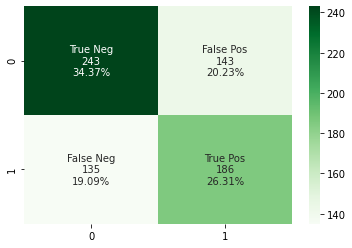

In [39]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')